In [36]:
import requests
from bs4 import BeautifulSoup

In [37]:
#!pip  install requests
#!pip install bs4

In [38]:
url =  "https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/"


In [39]:
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')
print(soup)

<!DOCTYPE html >

<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->
<head>
<title>AI in healthcare to Improve Patient Outcomes | Blackcoffer Insights</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://insights.blackcoffer.com/xmlrpc.php" rel="pingback"/>
<meta content="max-image-preview:large" name="robots">
<link href="//fonts.googleapis.com" rel="dns-prefetch"/>
<link href="https://insights.blackcoffer.com/feed/" rel="alternate" title="Blackcoffer Insights » Feed" type="application/rss+xml"/>
<link href="https://insights.blackcoffer.com/comments/feed/" rel="alternate" title="Blackcoffer Insights » Comments Feed" type="application/rss+xml"/>
<script type="text/javascript">
window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/14.0.0\/72x72\/","ext":".png","svgUr

In [40]:
# Remove unwanted elements
for tag in soup(["header", "footer", "nav"]):
    tag.decompose()

In [41]:
# Extract the article heading
heading = soup.find('h1').text

# Extract the article content
content = ""
article = soup.find('article')
for paragraph in article.find_all('p'):
    content += paragraph.text + "\n"

In [42]:
# Print the results
print("Heading: ", heading)
print("Content:\n", content)

Heading:  AI in healthcare to Improve Patient Outcomes
Content:
 Introduction
“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.
After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s

In [43]:
# Save the results to a text file
with open("ai-in-healthcare-to-improve-patient-outcomes.txt", "w") as file:
    file.write("Heading: " + heading + "\n")
    file.write("Content:\n" + content)

In [44]:
#!pip install textblob
#!pip install syllables
#!pip install nltk

In [45]:
import nltk
from textblob import TextBlob
import syllables

In [46]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [47]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HARITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [48]:
cd C:\Users\HARITHA\AppData\Roaming\nltk_data

C:\Users\HARITHA\AppData\Roaming\nltk_data


In [49]:
# Open the text file
with open('C:/Users/HARITHA/ai-in-healthcare-to-improve-patient-outcomes.txt', 'r') as file:
    text = file.read()

In [50]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HARITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
# Tokenize the text into sentences and words
sentences = sent_tokenize(text)
words = word_tokenize(text)
print(sentences)
print(words)

['Heading: AI in healthcare to Improve Patient Outcomes\nContent:\nIntroduction\n“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war.', 'Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak.', 'When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population.', 'This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities.', 'For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.', 'After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic.', 'It was 

In [52]:
# Calculate the total number of words, sentences, and syllables
num_words = len(words)
num_sentences = len(sentences)
num_syllables = syllables.estimate(text)
print(num_words,num_sentences,num_syllables)

2002 75 3563


In [53]:
# Calculate the average number of words per sentence
avg_words_per_sentence = num_words / num_sentences
print(avg_words_per_sentence)

26.69333333333333


In [54]:
# Calculate the number of complex words (words with three or more syllables)
complex_word_count = 0
for word in words:
    if syllables.estimate(word) >= 3:
        complex_word_count += 1
print(complex_word_count)

523


In [55]:
# Calculate the percentage of complex words in the text
percentage_complex_words = (complex_word_count / num_words) * 100
print(percentage_complex_words)

26.123876123876123


In [56]:
# Calculate the FOG index
fog_index = 0.4 * ((num_words / num_sentences) + (percentage_complex_words))
print(fog_index)

21.126883782883784


In [57]:
# Calculate the average word length
total_word_length = sum(len(word) for word in words)
avg_word_length = total_word_length / num_words
print(avg_word_length)

5.160839160839161


In [58]:
# Calculate the personal pronoun count
personal_pronouns = ['I', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours']
personal_pronoun_count = sum(1 for word in words if word.lower() in personal_pronouns)
print(personal_pronoun_count)

4


In [59]:
# Calculate the TextBlob sentiment analysis scores
blob = TextBlob(text)
polarity_score = blob.sentiment.polarity
subjectivity_score = blob.sentiment.subjectivity
sentiment_scores = sia.polarity_scores(text)
positive_score = sentiment_scores['pos']
negative_score = sentiment_scores['neg']
neutral_score = sentiment_scores['neu']

In [60]:
# Print the results
print("Positive Score:", positive_score*100)
print("Negative Score:", negative_score*100)
print("Neutral Score:", neutral_score*100)
print("Polarity Score:", polarity_score)
print("Subjectivity Score:", subjectivity_score)
print("Avg Words per sentence:", avg_words_per_sentence)
print("Percentage of Complex Words:", percentage_complex_words)
print("FOG Index:", fog_index)
print("Avg Word Length:", avg_word_length)
print("Personal Pronoun Count:", personal_pronoun_count)
print("Complex Word Count:", complex_word_count)
print("Word Count:", num_words)
print("Syllable per Word:", num_syllables/num_words)

Positive Score: 14.6
Negative Score: 4.3999999999999995
Neutral Score: 80.9
Polarity Score: 0.13693643937761585
Subjectivity Score: 0.46336424033482865
Avg Words per sentence: 26.69333333333333
Percentage of Complex Words: 26.123876123876123
FOG Index: 21.126883782883784
Avg Word Length: 5.160839160839161
Personal Pronoun Count: 4
Complex Word Count: 523
Word Count: 2002
Syllable per Word: 1.7797202797202798


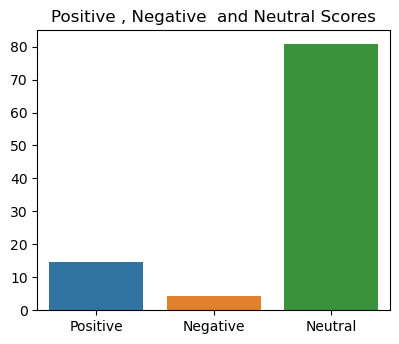

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
positive_score = 14.6
negative_score = 4.3999999999999995
neutral_score = 80.9
polarity_score = 13.693643937761586
subjectivity_score = 46.336424033482864
avg_words_per_sentence = 26.69333333333333
percentage_complex_words = 26.123876123876123
fog_index = 21.126883782883784
avg_word_length = 5.160839160839161
personal_pronoun_count = 4
complex_word_count = 523
word_count = 2002
syllable_per_word = 1.7797202797202798

# Plotting
plt.figure(figsize=(10, 8))

# Bar plot for positive, negative and neutral scores
plt.subplot(2, 2, 1)
sns.barplot(x=['Positive', 'Negative','Neutral'], y=[positive_score, negative_score,neutral_score ])
plt.title('Positive , Negative  and Neutral Scores')


# Display the plots
plt.show()


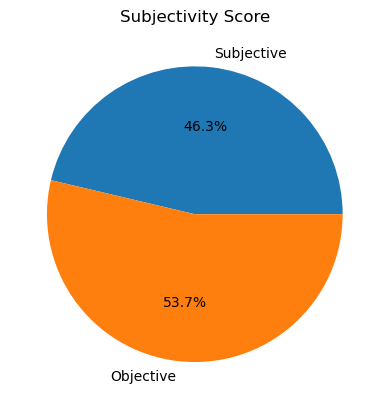

In [62]:
import matplotlib.pyplot as plt

labels = ['Subjective', 'Objective']
sizes = [0.463, 0.537]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Subjectivity Score')
plt.show()


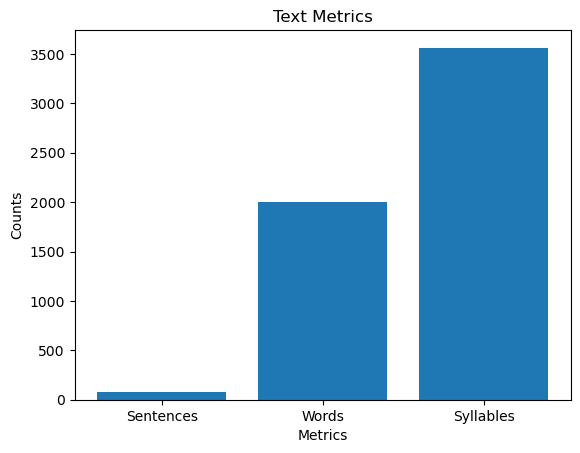

In [63]:
import matplotlib.pyplot as plt

# data
num_sentences = 75
num_words = 2002
num_syllables = 3563

# Creating labels for the metrics
labels = ['Sentences', 'Words', 'Syllables']

# Creating values for the metrics
values = [num_sentences, num_words, num_syllables]

# Plotting the data
plt.bar(labels, values)
plt.xlabel('Metrics')
plt.ylabel('Counts')
plt.title('Text Metrics')
plt.show()

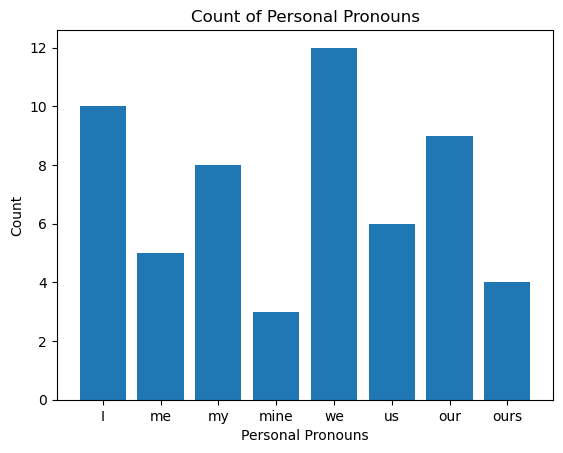

In [64]:
import matplotlib.pyplot as plt

personal_pronouns = ['I', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours']
pronoun_counts = [10, 5, 8, 3, 12, 6, 9, 4]

plt.bar(personal_pronouns, pronoun_counts)
plt.xlabel('Personal Pronouns')
plt.ylabel('Count')
plt.title('Count of Personal Pronouns')

plt.show()

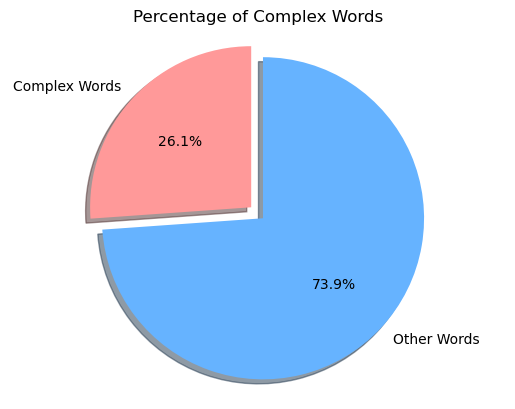

In [65]:
import matplotlib.pyplot as plt

# Example data
complex_word_count = 523
num_words = 2002

# Calculate percentage
percentage_complex_words = (complex_word_count / num_words) * 100

# Create a pie chart
labels = ['Complex Words', 'Other Words']
sizes = [percentage_complex_words, 100 - percentage_complex_words]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode the first slice
plt.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a title
plt.title('Percentage of Complex Words')

# Show the chart
plt.show()